<a href="https://colab.research.google.com/github/dioskit/ML-test/blob/main/titanic__solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer  # Import KNNImputer


Mounted at /content/drive


In [18]:
# Load datasets
test_path = "/content/drive/MyDrive/Colab Notebooks/titanic/test.csv"
train_path = "/content/drive/MyDrive/Colab Notebooks/titanic/train.csv"

dftrain = pd.read_csv(train_path).copy()
dftest = pd.read_csv(test_path).copy()


In [19]:
# Preprocess training data
dftrain['Sex'] = dftrain['Sex'].map({'female': 0, 'male': 1})
dftrain['Embarked'] = dftrain['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Define features and target for training
X = dftrain[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = dftrain['Survived']


In [42]:
# Handle missing values in training data using KNNImputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust n_neighbors as needed
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [43]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [44]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [47]:
# Train model
model = LogisticRegression(max_iter=1000,class_weight='balanced')
model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [48]:
# Make predictions on the testing data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = model.score(X_test_scaled, y_test)
print('Accuracy:', accuracy)


Accuracy: 0.8156424581005587


In [33]:
# Preprocess test data
dftest['Sex'] = dftest['Sex'].map({'female': 0, 'male': 1})
dftest['Embarked'] = dftest['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Handle missing values in test data using KNNImputer
dftest_imputed = pd.DataFrame(imputer.transform(dftest[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]), columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])


In [34]:
# Scale test features
dftest_scaled = scaler.transform(dftest_imputed)

# Make predictions on the test data
dftest['Survived'] = model.predict(dftest_scaled)
dftest[dftest['Survived'] == 1]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",NaN,23.0,1,0,21228,82.2667,B45,NaN,1
23,915,1,"Williams, Mr. Richard Norris II",NaN,21.0,0,1,PC 17597,61.3792,NaN,NaN,1
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",NaN,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,NaN,1
26,918,1,"Ostby, Miss. Helene Ragnhild",NaN,22.0,0,1,113509,61.9792,B36,NaN,1
28,920,1,"Brady, Mr. John Bertram",NaN,41.0,0,0,113054,30.5000,A21,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
402,1294,1,"Gibson, Miss. Dorothy Winifred",NaN,22.0,0,1,112378,59.4000,NaN,NaN,1
403,1295,1,"Carrau, Mr. Jose Pedro",NaN,17.0,0,0,113059,47.1000,NaN,NaN,1
407,1299,1,"Widener, Mr. George Dunton",NaN,50.0,1,1,113503,211.5000,C80,NaN,1
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",NaN,37.0,1,0,19928,90.0000,C78,NaN,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


<Axes: xlabel='Pclass', ylabel='count'>

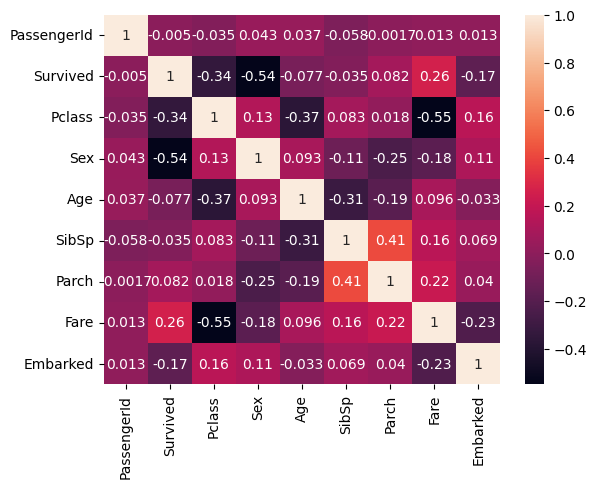

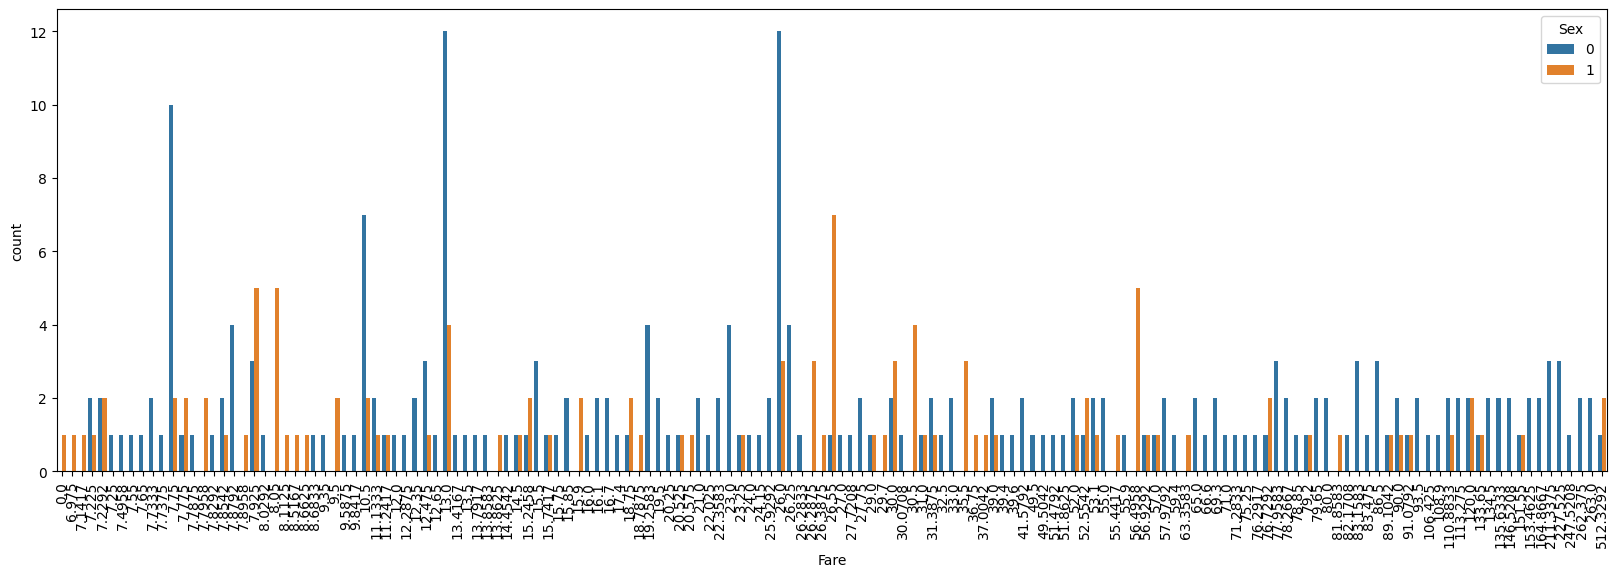

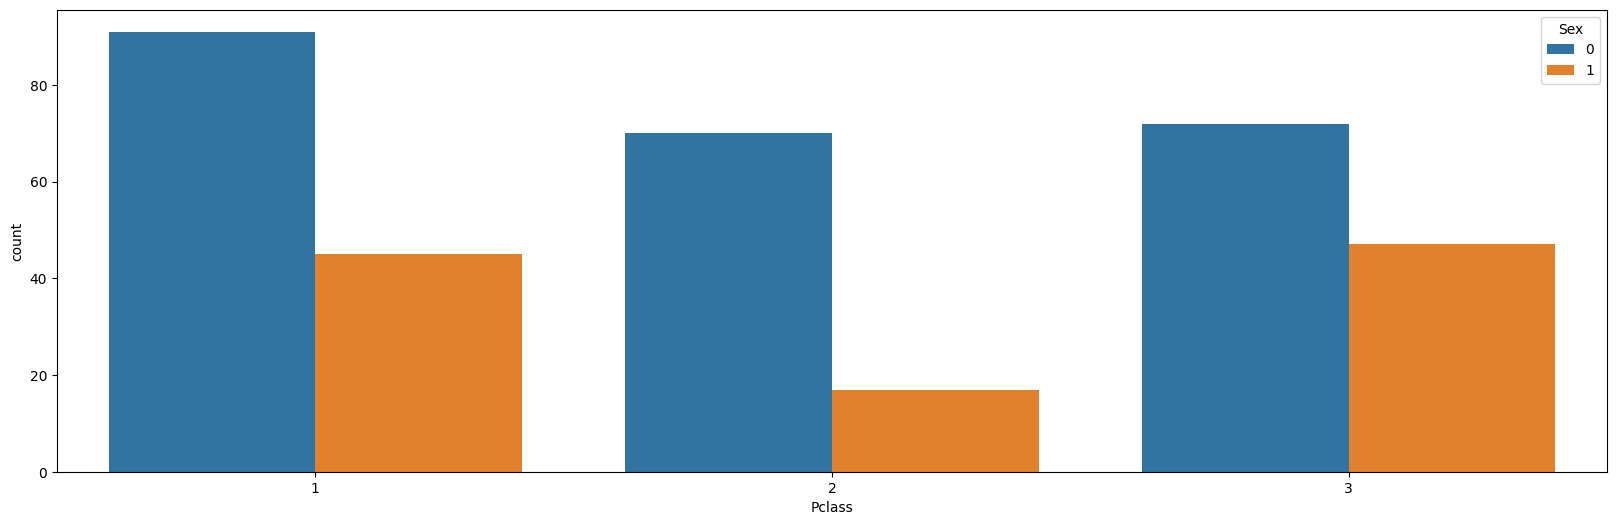

In [27]:
# Correlation heatmap for training data
sns.heatmap(dftrain.select_dtypes(include=np.number).corr(), annot=True)
dftrain.info()

# Visualize Fare distribution by Sex for Survived passengers
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Fare', hue='Sex', data=dftrain[dftrain['Survived'] == 1])

# Visualize Pclass distribution by Sex for Survived passengers
plt.figure(figsize=(20,6))
sns.countplot(x='Pclass', hue='Sex', data=dftrain[dftrain['Survived'] == 1])


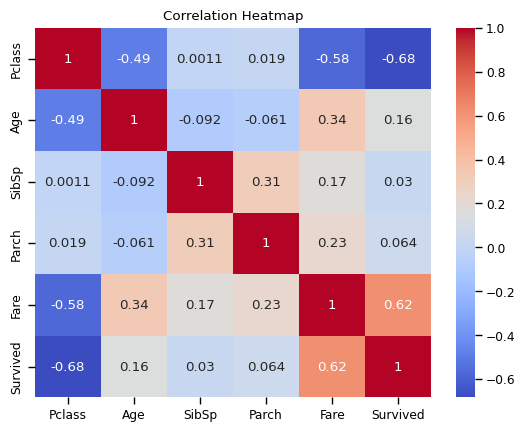

<Figure size 2000x600 with 0 Axes>

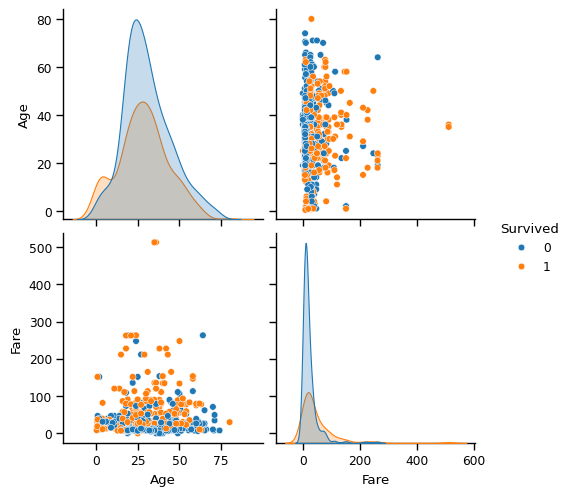

In [49]:
# Correlation heatmap for test data
sns.set_context('paper')
corr = dftest[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for Age and Fare by Survival in training data
plt.figure(figsize=(20,6))
sns.pairplot(dftrain, hue='Survived', vars=['Age', 'Fare'])
plt.show()
